In [1]:
import pandas as pd
import numpy as np
import datetime as dt 
import requests

In [2]:
url = 'https://raw.githubusercontent.com/adecate/Deep-Generative-models-VaR/main/Data/commodities_dataset.csv'
open('commodities_dataset.csv', 'wb').write(requests.get(url).content)
commodities = pd.read_csv('commodities_dataset.csv')#, index_col='Date'


url = 'https://raw.githubusercontent.com/adecate/Deep-Generative-models-VaR/main/Data/stocks_dataset.csv'
open('stocks_dataset.csv', 'wb').write(requests.get(url).content);
stocks = pd.read_csv('stocks_dataset.csv')#, index_col='Date'

In [3]:
stocks['Date'] =  pd.to_datetime(stocks['Date'])
stocks['year'] = stocks['Date'].dt.year
stocks = stocks.set_index('Date')
stocks

,AAPL,MSFT,PFE,NVDA,CVX,year
Date,,,,,,
2013-01-02,19.608213,27.620001,24.582542,3.180000,110.389999,2013
2013-01-03,19.360714,27.250000,24.525618,3.182500,109.919998,2013
2013-01-04,18.821428,26.740000,24.629980,3.287500,110.500000,2013
2013-01-07,18.710714,26.690001,24.648956,3.192500,109.750000,2013
2013-01-08,18.761070,26.549999,24.686907,3.122500,109.260002,2013
...,...,...,...,...,...,...
2023-05-26,175.429993,332.890015,37.599998,389.459991,154.080002,2023
2023-05-30,177.300003,331.209991,37.009998,401.109985,153.119995,2023
2023-05-31,177.250000,328.390015,38.020000,378.339996,150.619995,2023


In [4]:
stocks = stocks[stocks['year'] == 2022]
stocks = stocks.drop(columns=['year'])

In [5]:
stocks.describe()

,AAPL,MSFT,PFE,NVDA,CVX
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,154.835060,268.917091,49.827649,185.689562,158.942550
std,13.056081,25.761774,3.249907,46.412799,16.329160
min,126.040001,214.250000,41.750000,112.269997,119.260002
25%,144.645004,247.180000,47.740000,153.279999,146.750000
50%,154.089996,265.899994,49.970001,172.220001,160.619995
75%,165.915001,289.744995,52.305000,222.635002,171.695000
max,182.009995,334.750000,56.689999,301.209991,188.050003


In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   MSFT    251 non-null    float64
 2   PFE     251 non-null    float64
 3   NVDA    251 non-null    float64
 4   CVX     251 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [7]:
stocks_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) 

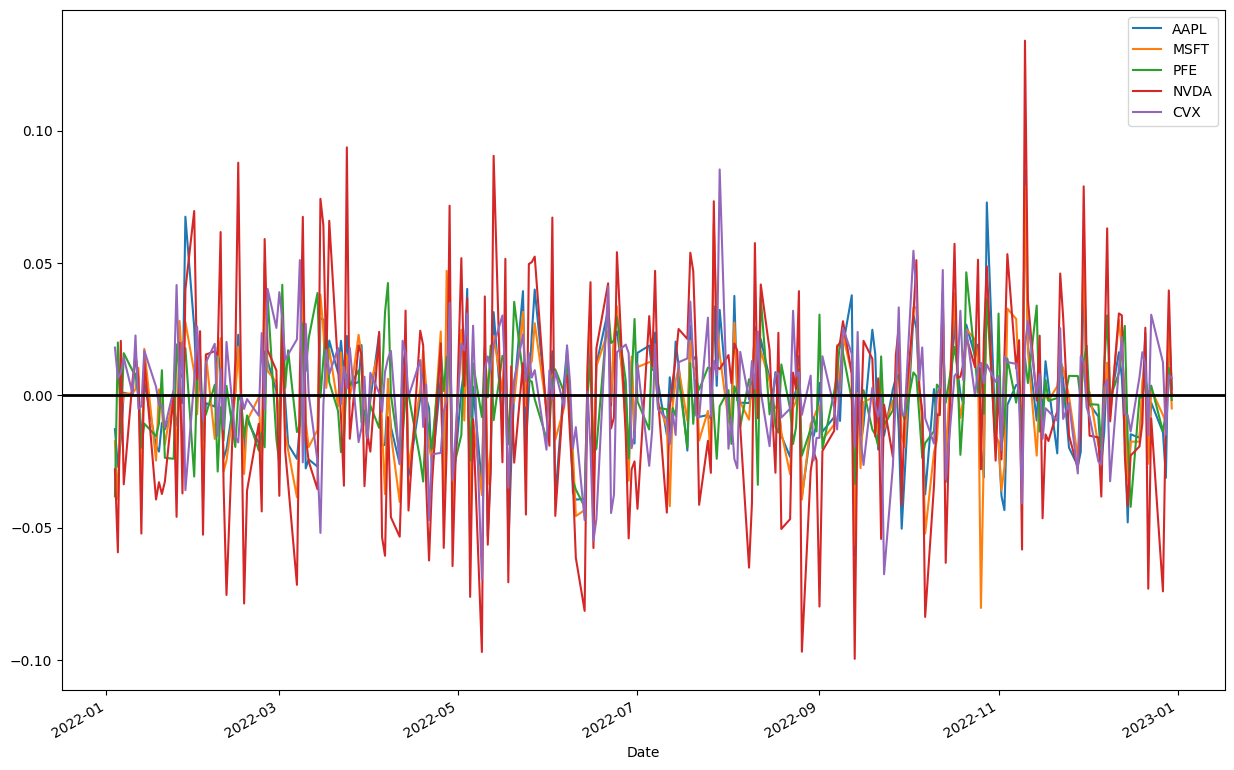

In [8]:
stocks_change[:].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

In [9]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import scipy.stats as stats


def lognorm_distr(df, ticket):
    fig, ax = plt.subplots(figsize=(10, 6))

    values = df[ticket]

    shape, loc, scale = stats.lognorm.fit(values) 
    x = np.linspace(values.min(), values.max(), len(values))
    pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
    label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

    ax.hist(values, bins=50, density =True,alpha=0.5)
    ax.plot(x, pdf, 'r-', lw=2, label=label)
    ax.legend(loc='best')
    ax.set_title(ticket)

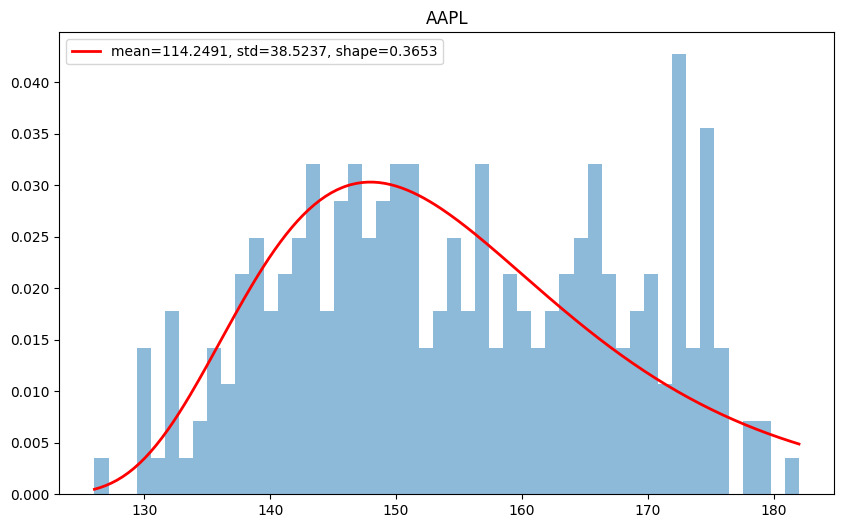

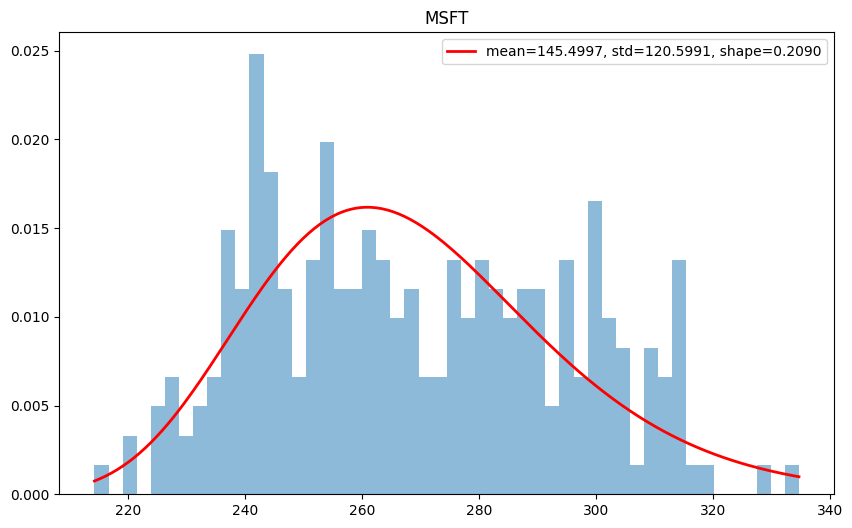

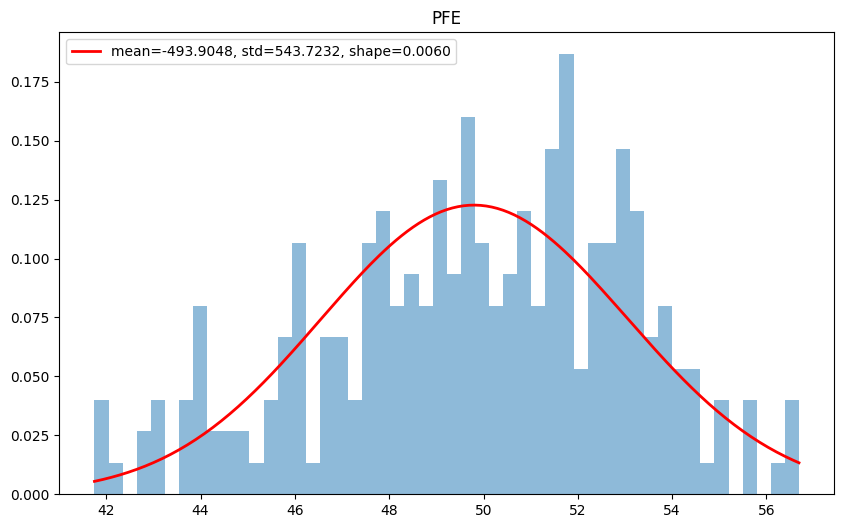

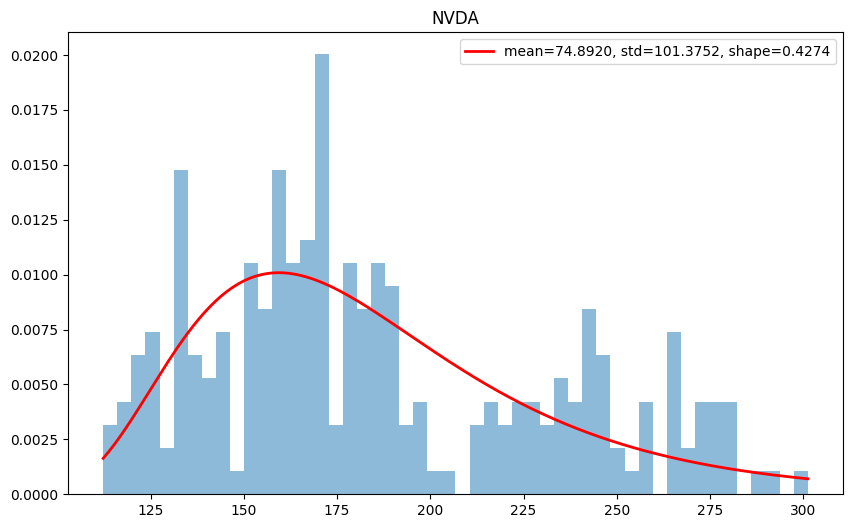

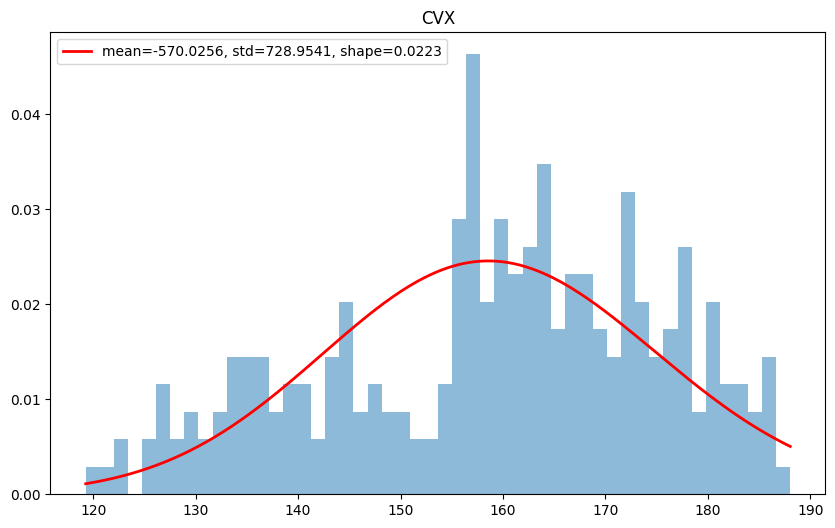

In [10]:
for ticket in stocks.columns:
    lognorm_distr(stocks, ticket)

In [11]:
def logret_dist(df, ticket):
    values = df[ticket][1:]  # skip first NA value
    x = np.linspace(values.min(), values.max(), len(values))

    loc, scale = stats.norm.fit(values)
    param_density = stats.norm.pdf(x, loc=loc, scale=scale)
    label = 'mean=%.4f, std=%.4f' % (loc, scale)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(values, bins=50, density=True, alpha=0.5)
    ax.plot(x, param_density, 'r-', label=label)
    ax.legend(loc='best')
    ax.set_title(ticket)

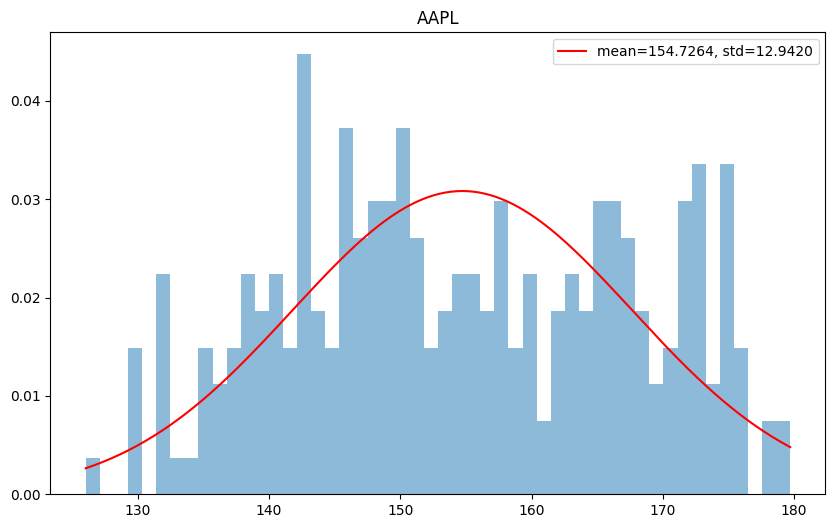

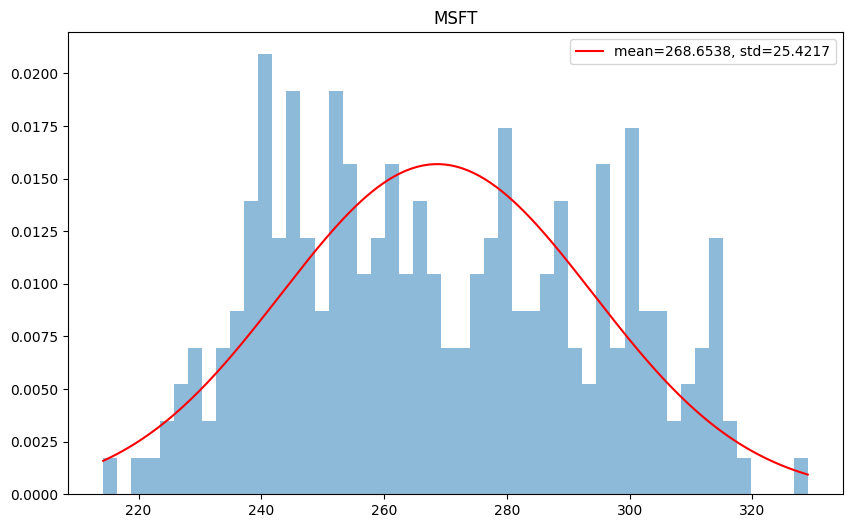

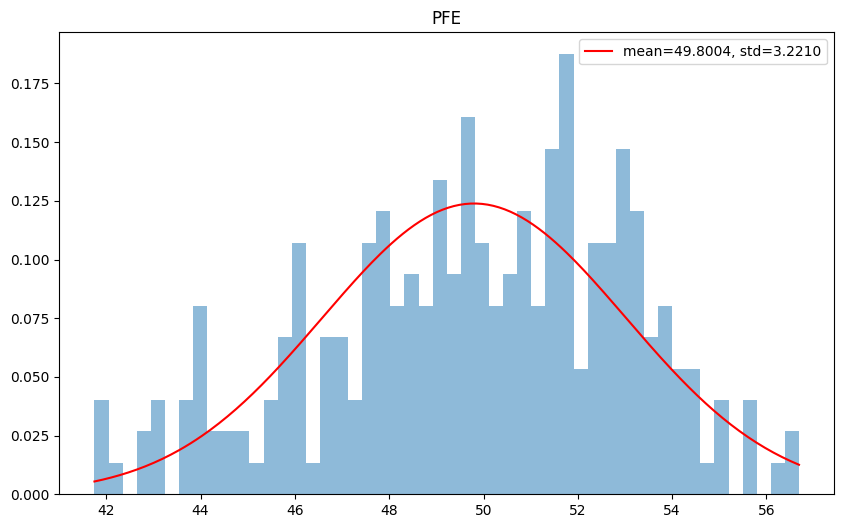

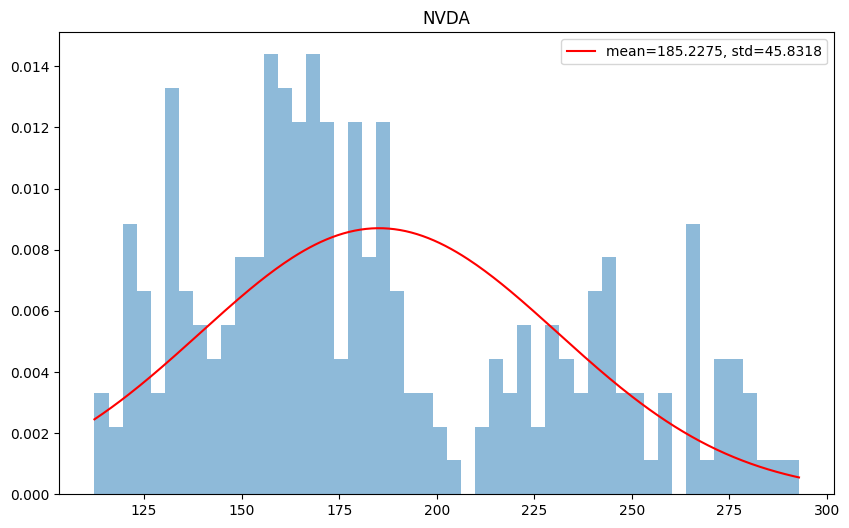

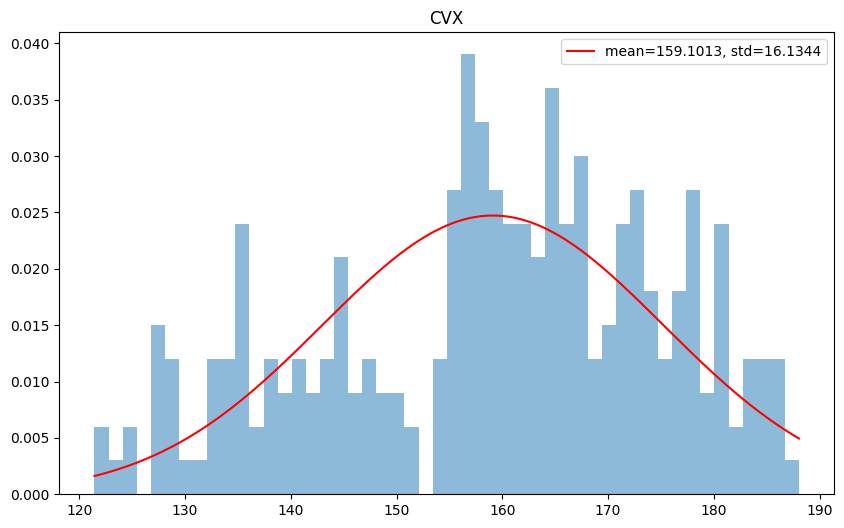

In [12]:
for ticket in stocks.columns:
    logret_dist(stocks, ticket)

<ipython-input-13-08726efbaf84>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

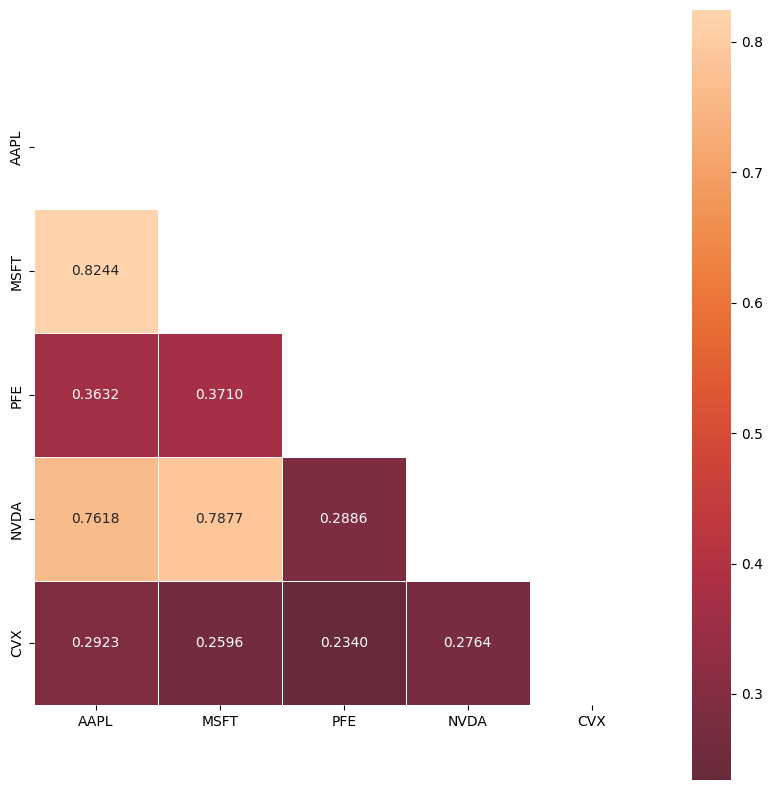

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = stocks_change.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)